In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from dataprep.eda import create_report

In [3]:
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
dataset = pd.read_csv('./datalab/Placement_Data_Full_Class.csv')

In [6]:
create_report(dataset).show_browser()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\dask\datafram

  0%|          | 0/1638 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


In [151]:
dataset.drop(['sl_no','ssc_p','hsc_p','degree_p', 'etest_p', 'mba_p'],axis=1, inplace=True)

In [152]:
dataset.dropna(axis=0, inplace=True)

In [153]:
dataset['specialisation']=dataset['specialisation'].apply(lambda x : x.split('&')[1])

In [154]:
dataset['degree_t']=dataset['degree_t'].apply(lambda x : x.split('&')[0])

In [155]:
median = dataset['salary'].median()

In [156]:
dataset['salary'] = dataset.salary.fillna(median)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [158]:
dataset['ssc_b'] = le.fit_transform(dataset['ssc_b'])
dataset['specialisation'] = le.fit_transform(dataset['specialisation'])
dataset['gender'] = le.fit_transform(dataset['gender'])
dataset['hsc_b'] = le.fit_transform(dataset['hsc_b'])
dataset['workex'] = le.fit_transform(dataset['workex'])
dataset['status'] = le.fit_transform(dataset['status'])

In [127]:
scale = StandardScaler()
dataset[['ssc_p','hsc_p','degree_p', 'etest_p', 'mba_p']] = scale.fit_transform(dataset[['ssc_p','hsc_p','degree_p','etest_p','mba_p']])

In [161]:
dataset.head(10)

,gender,ssc_b,hsc_b,workex,specialisation,status,salary,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci
0,1,1,1,0,1,0,270000.0,1,0,0,1
1,1,0,1,1,0,0,200000.0,0,1,0,1
2,1,0,0,0,0,0,250000.0,0,0,0,0
4,1,0,0,0,0,0,425000.0,1,0,0,0
7,1,0,0,1,0,0,252000.0,0,1,0,1
8,1,0,0,0,0,0,231000.0,1,0,0,0
10,1,0,0,1,1,0,260000.0,1,0,0,0
11,1,0,0,1,0,0,250000.0,1,0,0,0
13,0,0,0,0,0,0,218000.0,1,0,0,0
15,0,0,0,1,0,0,200000.0,1,0,0,0


In [160]:
dataset = pd.get_dummies(data=dataset,columns=['hsc_s','degree_t'], drop_first=True)

In [162]:
X = dataset.drop(['salary'], axis=1).values
y = dataset['salary'].values

In [163]:
X

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [164]:
y

array([270000., 200000., 250000., 425000., 252000., 231000., 260000.,
       250000., 218000., 200000., 300000., 236000., 265000., 393000.,
       360000., 300000., 360000., 240000., 265000., 350000., 250000.,
       278000., 260000., 300000., 320000., 240000., 411000., 287000.,
       300000., 200000., 204000., 250000., 200000., 450000., 216000.,
       220000., 240000., 360000., 268000., 265000., 260000., 300000.,
       240000., 240000., 275000., 275000., 275000., 360000., 240000.,
       240000., 218000., 336000., 230000., 500000., 270000., 240000.,
       300000., 300000., 300000., 400000., 220000., 210000., 210000.,
       300000., 230000., 260000., 420000., 300000., 220000., 380000.,
       300000., 240000., 360000., 200000., 300000., 250000., 250000.,
       280000., 250000., 216000., 300000., 240000., 276000., 940000.,
       250000., 236000., 240000., 250000., 350000., 210000., 250000.,
       400000., 250000., 360000., 300000., 250000., 250000., 200000.,
       225000., 2500

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [189]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [47]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [166]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [167]:
y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test.values),1)),1))

In [168]:
from sklearn.metrics import mean_squared_error, r2_score

In [169]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R²: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 8834133066.13
R²: -0.04


<AxesSubplot:ylabel='Count'>

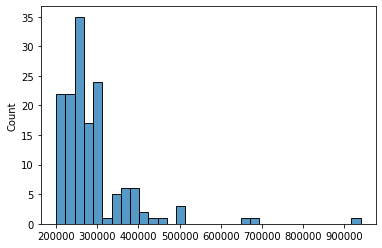

In [171]:
sns.histplot(x= y)